Kích thước ảnh sau khi chuyển đổi: torch.Size([1, 1, 330, 620])
torch.Size([1, 1, 330, 620]) torch.Size([1, 1, 330, 620])


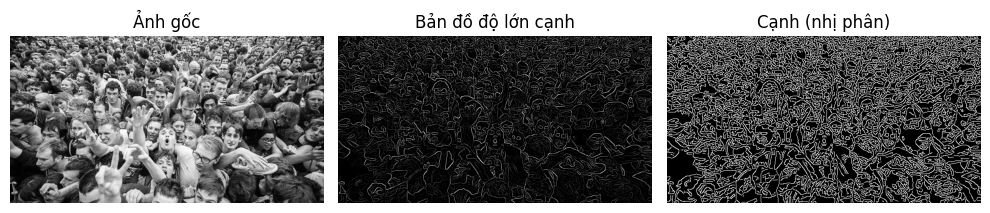

In [10]:
import torch
import kornia.filters as KF
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np

# Giả sử bạn có một tệp ảnh tên là 'my_image.jpg' hoặc 'my_image.png'
# Tạo một ảnh giả nếu bạn không có sẵn để chạy thử
try:
    img_pil = Image.open(r'E:\\simulations\\implementations\\experiment\\canny\\crowded.jpg').convert("L") # Đọc và chuyển sang grayscale
except FileNotFoundError:
    print("Không tìm thấy 'my_image.jpg'. Tạo ảnh ngẫu nhiên để minh họa.")
    # Tạo ảnh ngẫu nhiên giả lập ảnh 28x28 grayscale
    img_pil = Image.fromarray(np.random.randint(0, 255, (28, 28), dtype=np.uint8))


# Định nghĩa các phép biến đổi:
# 1. Chuyển từ PIL Image sang PyTorch Tensor
# 2. Chuẩn hóa giá trị pixel về khoảng [0, 1]
transform = T.Compose([
    T.ToTensor(),  # Chuyển PIL Image sang Tensor, tự động chia 255.0
])

# Áp dụng biến đổi cho ảnh
image_tensor = transform(img_pil).unsqueeze(0) # Thêm chiều batch (1, C, H, W)

print(f"Kích thước ảnh sau khi chuyển đổi: {image_tensor.shape}")

# Khởi tạo và áp dụng Canny
canny_detector = KF.Canny(low_threshold=0.1, high_threshold=0.3, kernel_size=(5, 5))
magnitude, edges = canny_detector(image_tensor)

print(magnitude.shape, edges.shape)

# Hiển thị kết quả
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_pil, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude.squeeze().cpu().numpy(), cmap='gray')
plt.title("Bản đồ độ lớn cạnh")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges.squeeze().cpu().numpy(), cmap='gray')
plt.title("Cạnh (nhị phân)")
plt.axis('off')

plt.tight_layout()
plt.show()